# 01 Importing Libraries & Data

## 01.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensure created graphs are displayed

%matplotlib inline

## 01.2 Importing Data

In [3]:
# Create path

path = r'/Users/david/Desktop/CF/Data Immersion/Achievement 6 - Advnaced Analytics & Dashboard Design'

In [4]:
# Verify path

path

'/Users/david/Desktop/CF/Data Immersion/Achievement 6 - Advnaced Analytics & Dashboard Design'

In [5]:
# Import 'bnb_cdmx_080922.pkl'

bnb_MC = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '09_Sep_2022', 'bnb_cdmx_080922.pkl'))

# 02. Data Cleaning

#### Reflect the changes made in the last exercise--locations were added up, and those variables must be addressed: 'host_loc

In [6]:
# List 'bnb_MC' columns

list(bnb_MC.columns)

['listing_id',
 'listing_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'acceptance_rate',
 'superhost',
 'host_listings_count',
 'host_identity_verified',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'bedrooms',
 'price',
 'min_nights',
 'max_nights',
 'has_availability',
 'availability_365',
 'revs_num',
 'first_rev',
 'last_rev',
 'review_scores_rating',
 'reviews_per_month',
 'bookings_num',
 'host_loc',
 'host_nh',
 'nh',
 'nh_cleansed']

## 02.1 Drop columns

In [7]:
# Drop url columns

bnb_MC = bnb_MC.drop(columns = ['listing_url', 'host_url', 'host_loc', 'host_nh', 'nh'])

In [8]:
# Verify columns

list(bnb_MC.columns)

['listing_id',
 'host_id',
 'host_name',
 'host_since',
 'acceptance_rate',
 'superhost',
 'host_listings_count',
 'host_identity_verified',
 'latitude',
 'longitude',
 'room_type',
 'accommodates',
 'bedrooms',
 'price',
 'min_nights',
 'max_nights',
 'has_availability',
 'availability_365',
 'revs_num',
 'first_rev',
 'last_rev',
 'review_scores_rating',
 'reviews_per_month',
 'bookings_num',
 'nh_cleansed']

,listing_id,host_id,host_name,host_since,acceptance_rate,superhost,host_listings_count,host_identity_verified,latitude,longitude,...,max_nights,has_availability,availability_365,revs_num,first_rev,last_rev,review_scores_rating,reviews_per_month,bookings_num,nh_cleansed
0,15511977,93364273,Abraham,2016-09-03,NaN,f,2,f,19.41095,-99.24418,...,1125,t,179,1,2018-03-19,2018-03-19,5.00,0.02,365,Miguel Hidalgo
1,44616,196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,66,f,9,t,19.41162,-99.17794,...,365,t,347,56,2011-11-09,2022-06-05,4.59,0.43,365,Cuauhtémoc
2,34776449,2954577,Lazaro Alejandro,2012-07-16,100,t,3,t,19.42641,-99.22591,...,30,t,222,5,2019-07-04,2022-03-14,5.00,0.14,365,Miguel Hidalgo
3,56074,265650,Maris,2010-10-19,90,t,2,t,19.43977,-99.15605,...,250,t,344,72,2011-04-02,2022-06-19,4.88,0.53,365,Cuauhtémoc
4,58955,282620,Laura,2010-11-09,29,f,1,t,19.42113,-99.15955,...,60,t,47,45,2011-12-26,2022-01-06,5.00,0.35,365,Cuauhtémoc


In [10]:
bnb_MC.shape

(17679, 25)

In [79]:
len(bnb_MC.listing_id.unique())

17679

In [80]:
len(bnb_MC.host_id.unique())

8893

## 02.2 Missing values

In [11]:
# Check missing values

bnb_MC.isnull().sum()

listing_id                   0
host_id                      0
host_name                    0
host_since                   0
acceptance_rate           1100
superhost                    0
host_listings_count          0
host_identity_verified       0
latitude                     0
longitude                    0
room_type                    0
accommodates                 0
bedrooms                   450
price                        0
min_nights                   0
max_nights                   0
has_availability             0
availability_365             0
revs_num                     0
first_rev                    0
last_rev                     0
review_scores_rating         0
reviews_per_month            0
bookings_num                 0
nh_cleansed                  0
dtype: int64

#### The missing values in 'acceptance_rate' and 'bedrooms' will be left as they are since 'acceptance_rate' may indicate the host is not active and 'bedrooms' will be looked into it to support this belief.

## 02.3 Duplicates

In [12]:
bnb_MC_dups = bnb_MC.duplicated()

In [13]:
bnb_MC_dups.shape

(17679,)

#### No dups.

## 02.4 Extreme values

/Users/david/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='host_listings_count', ylabel='Density'>

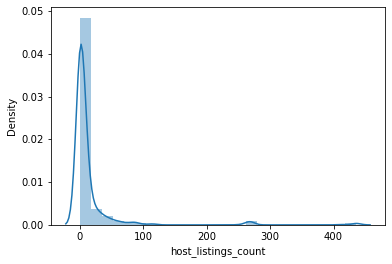

In [14]:
# Check for extreme values

sns.distplot(bnb_MC['host_listings_count'], bins = 25)

In [15]:
# Check mean

bnb_MC['host_listings_count'].mean()

15.656937609593303

In [16]:
# Check median

bnb_MC['host_listings_count'].median()

2.0

In [17]:
# Check max 

bnb_MC['host_listings_count'].max()

436

/Users/david/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='listing_id', ylabel='Density'>

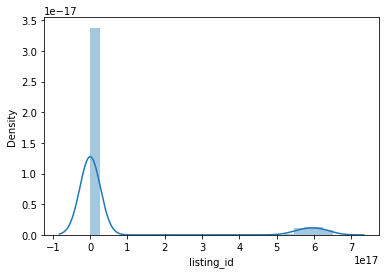

In [18]:
sns.distplot(bnb_MC['listing_id'], bins = 25)

In [21]:
# Check 'host_id' count

bnb_MC.groupby('host_id').agg({'host_id': ['count']})

,host_id
,count
host_id,
7365,1
36836,1
50129,1
60079,1
64092,1
...,...
462791315,1
462890557,1


In [23]:
# Check 'host_id' mean

bnb_MC.groupby('host_id').agg({'host_id': ['count']}).mean()

host_id  count    1.987968
dtype: float64

In [25]:
# Check 'host_id' median

bnb_MC.groupby('host_id').agg({'host_id': ['count']}).median()

host_id  count    1.0
dtype: float64

In [26]:
# Check 'host_id' max

bnb_MC.groupby('host_id').agg({'host_id': ['count']}).max()

host_id  count    126
dtype: int64

In [34]:
# Define 'host_id' count

host_id_cnt = bnb_MC.groupby('host_id').agg({'host_id': ['count']})

In [ ]:
# Create a new variable with the number of times a host repeats its listings

bnb_MC['host_id_cnts'] = bnb_MC.groupby(['host_id'])['host_id'].transform(np.max)

#  03 Data Prep for Regression Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

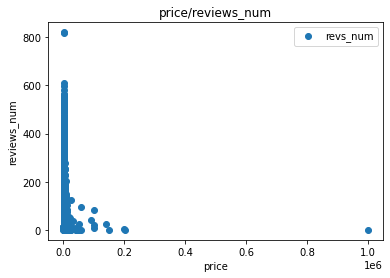

In [83]:
# Create scatterplot for relevant variables

bnb_MC.plot(x = 'price', y = 'revs_num', style = 'o')
plt.title('price/reviews_num')
plt.xlabel('price')
plt.ylabel('reviews_num')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

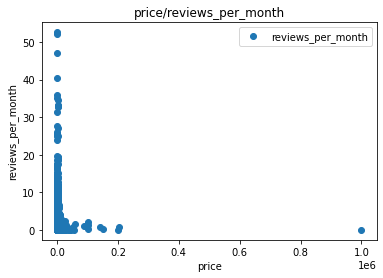

In [86]:
# Create scatterplot for relevant variables

bnb_MC.plot(x = 'price', y = 'reviews_per_month', style = 'o')
plt.title('price/reviews_per_month')
plt.xlabel('price')
plt.ylabel('reviews_per_month')
plt.show

# 04 Running the Regression Analysis

In [87]:
# Reshape variables into NumPy arrays

X = bnb_MC['price'].values.reshape(-1, 1)
y = bnb_MC['revs_num'].values.reshape(-1, 1)

In [88]:
X

array([[  800],
       [18000],
       [ 1779],
       ...,
       [  897],
       [  230],
       [ 3228]])

In [89]:
y

array([[  1],
       [ 56],
       [  5],
       ...,
       [107],
       [  5],
       [ 58]])

In [90]:
# Split dat ainto a training data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [91]:
# Create a regression object

regression = LinearRegression()

In [92]:
# Fit the regression object onto training set

regression.fit(X_train, y_train)

LinearRegression()

In [93]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

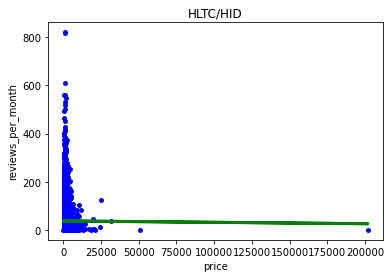

In [94]:
# Create a plot showing teh regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color = 'blue', s = 15)
plot_test.plot(X_test, y_predicted, color = 'green', linewidth = 3)
plot_test.title('HLTC/HID')
plot_test.xlabel('price')
plot_test.ylabel('reviews_per_month')
plot_test.show()

#### The intention was to corroborate if the higher the price, the less reviews a listing would have, but this model doesn't really tells anythion about this.

#### You'll clearly see that most of the lisitngs remain within a realtively short (competitive) range of prices, whereas the revies per month are distributed along a broader range.

In [98]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [96]:
print('Slope:', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-5.72684024e-05]]
Mean squared error:  3869.323271516632
R2 score:  -0.0009692734725734731


#### The slope is negative because most of the prices are "clustered" in a small range, and there's a broad range of revies per month whereas despite the prices.

#### The rmse in this case is demostrating that the values are highly dispersed

#### The r2 score is negative wich can be interpretated as if it was "0"; this means the model has a poor fit.

In [99]:
y_predicted

array([[38.12742639],
       [38.18165957],
       [38.16161563],
       ...,
       [38.16344821],
       [38.1652808 ],
       [38.18967714]])

In [62]:
# create dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,53361285,1.406491e+08
1,183412199,1.584004e+08
2,432454965,1.584004e+08
3,161301984,1.588935e+08
4,220829600,1.588935e+08
5,461793397,1.586469e+08
6,154468717,1.586469e+08
7,359265212,1.588935e+08
8,27449159,1.532229e+08
9,158865104,1.588935e+08


#### After careful checks, the analysis does not consider the model is being affected by any bias. Instead, (most likely) the approach to extract insights from the customer base might need to change, meaning the direction of the analysis has to change as the model does not tell anything relevant.

#### Another model meassuring the listings per host and the total number of hosts was performed, but since the variables have id instead of continuous or discrete values, the model was dropped.